In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [2]:
df = pd.read_excel("C:\\Users\\George\\Documents\\Football Analytics\\Data\\CB Pairings.xlsx")

In [3]:
df = df[['Rank','Player 1', 'Player 2', 'MP', 'PPM', 'GA per 90', 'xGA per 90', 'Opp Diff (avg league pos)']]

In [4]:
df.rename(columns={'Player 1': 'Right CB', 'Player 2': 'Left CB', 'MP': 'Matches Played', 'PPM': 'Points per Match', 'GA per 90': 'Goals Against per 90', 'xGA per 90': 'Expected Goals Against per 90', 'Opp Diff (avg league pos)': 'Opponent Difficulty (Avg League Position)'}, inplace=True)

In [5]:
df[['Goals Against per 90', 'Expected Goals Against per 90','Points per Match','Opponent Difficulty (Avg League Position)']] = df[['Goals Against per 90', 'Expected Goals Against per 90','Points per Match','Opponent Difficulty (Avg League Position)']].round(1)

In [6]:
df['Right Image'] = df['Right CB'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Images/{x}.{'png'or'webp'}")
df['Left Image'] = df['Left CB'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Images/{x}.{'png'or'webp'}")

In [7]:
df = df[['Rank','Right Image', 'Left Image','Matches Played', 'Points per Match', 'Goals Against per 90', 'Expected Goals Against per 90', 'Opponent Difficulty (Avg League Position)' ]]

In [8]:
df.rename(columns={'Right Image':'Right CB','Left Image':'Left CB','Matches Played':'Matches','Points per Match':'Points','Goals Against per 90':'Goals Against','Expected Goals Against per 90':'Expected Goals Against','Opponent Difficulty (Avg League Position)':'Opponent Diff'}, inplace=True)

In [9]:
df.sort_values(by='Rank', ascending=True, inplace=True)

In [10]:
# Background colour
bg_colour = "#E8E5DC"
text_colour = "black"
plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

In [11]:
import numpy as np
col_defs = [
    ColumnDefinition(
        name="Rank",
        textprops={"ha" : "left"},
        width=0.3,
    ),
    ColumnDefinition(
        name="Right CB",
        group = 'Centre Back Pairing',
        textprops={"ha" : "center", "va" : "center"},
        width=0.7,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Left CB",
        group = 'Centre Back Pairing',
        textprops={"ha" : "center", "va" : "center"},
        width=0.7,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Matches",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Points",
        group='Per Match Data',
        width=0.5, 
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.15}},
        cmap=normed_cmap(df["Points"], cmap=matplotlib.cm.RdYlGn, num_stds=3)
    ),
    ColumnDefinition(
        name="Goals Against",
        group='Per Match Data',
        textprops={"ha" : "center"},
        width=1.0,
    ),
    ColumnDefinition(
        name="Expected Goals Against",
        group='Per Match Data',
        textprops={"ha" : "center"},
        width=1.0,
    ),
    ColumnDefinition(
        name="Opponent Diff",
        group='Avg League Pos',
        width=1.0,
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.15}},
        cmap=normed_cmap(df["Opponent Diff"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    )
]

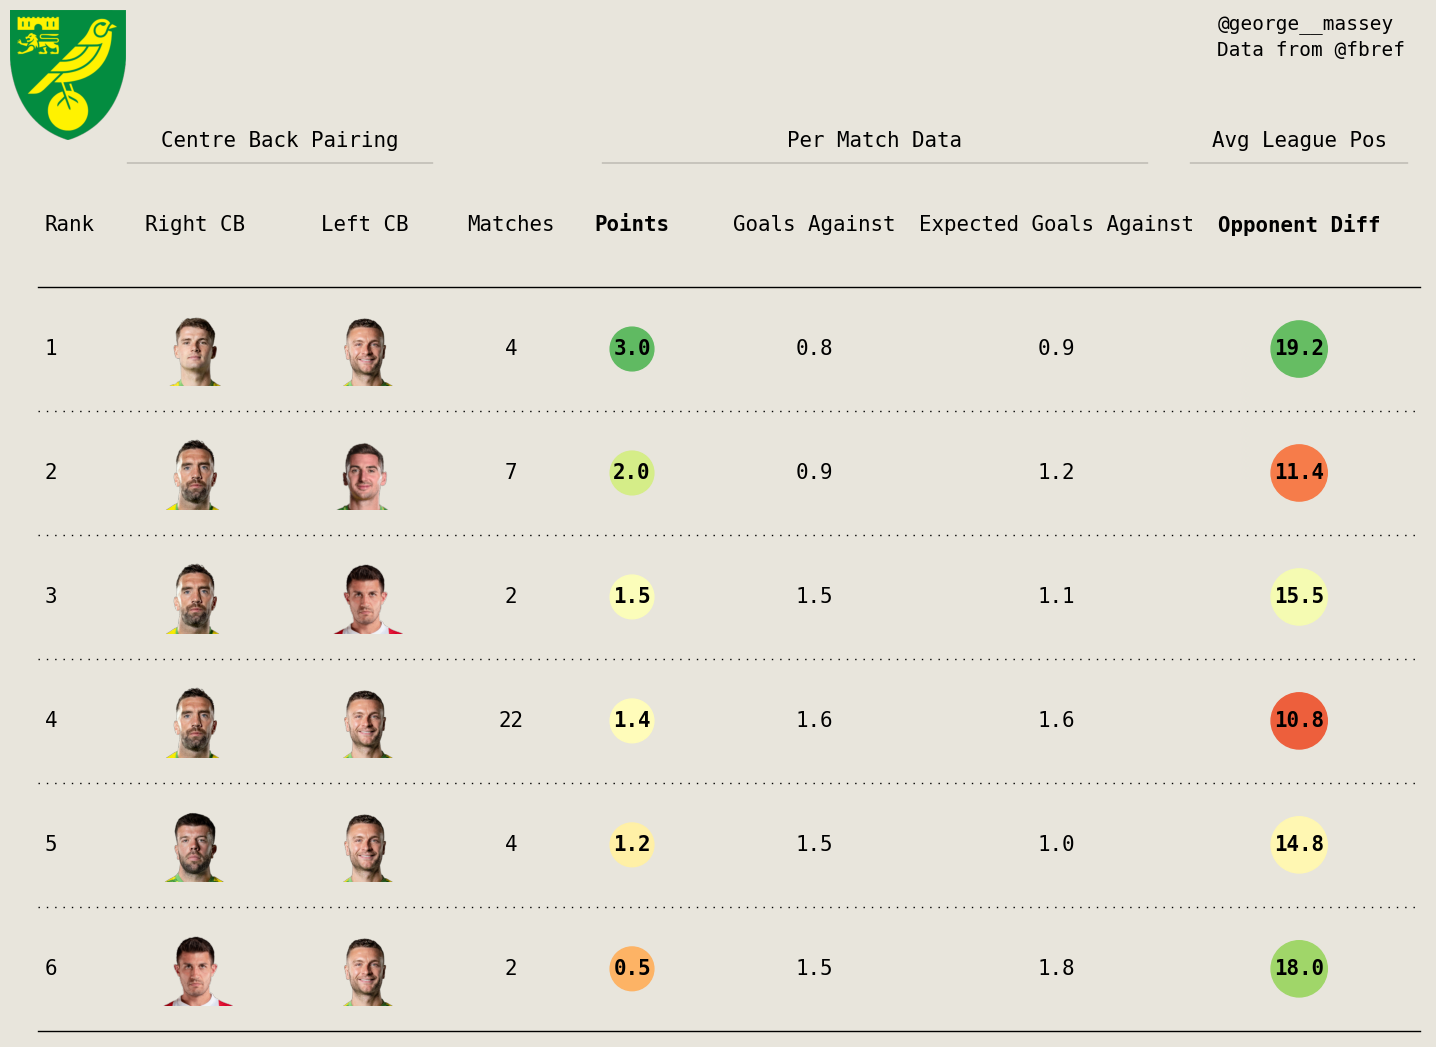

In [12]:
from PIL import Image
fig, ax = plt.subplots(figsize=(18, 13))
fig.set_facecolor(bg_colour)
ax.set_facecolor(bg_colour)

# Add your name in the top left corner
ax.text(0.85, 1.02, "@george__massey", fontsize=14, transform=ax.transAxes, ha='left', va='top')
ax.text(0.85, 0.995, "Data from @fbref", fontsize=14, transform=ax.transAxes, ha='left', va='top')
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rank",
    row_dividers=True,
    row_divider_kw={"linewidth" : 1, "linestyle" : (0, (1,5))},
    footer_divider=True,
    textprops={"fontsize" : 15},
    ax=ax,
)
ax2 = fig.add_axes([.11,.8,.07,.10])
ax2.axis('off')
img = Image.open("C:/Users/George/Documents/Football Analytics/Team Logos/norwich city_logo.png")
ax2.imshow(img)

In [13]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Norwich_Pairings.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)